<a href="https://colab.research.google.com/github/Anaisha12/Habitabilty_score-predictor-_-ML-project/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 21.9 MB 139 kB/s
     |████████████████████████████████| 102 kB 6.7 MB/s 
     |████████████████████████████████| 690 kB 31.1 MB/s 
     |████████████████████████████████| 4.7 MB 59.3 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 15.8 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=ae9ef10469d9b38c538e8d41b262c616810c8eb64e29d665adeecc3c2e9b3bbf
  Stored in directory: /tmp/pip-ephem-wheel-cache-rt6kj83o/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=caf529490e14aa82a1a9c73f387861d60a52060dfef00c22ff07c7aed6d7f9c0
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(test.shape)
train.drop(["Property_ID"],axis=1,inplace=True)
m=test["Property_ID"]
test.drop(["Property_ID"],axis=1,inplace=True)
print(train.shape)
print(test.shape)
# train.dropna(inplace=True)
# test.dropna(inplace=True)
print(train.shape)
# print(test.shape)



(10500, 14)
(39499, 14)
(10500, 13)
(39499, 14)


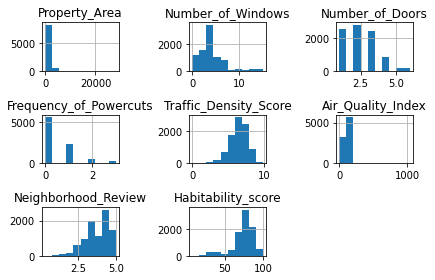

In [ ]:
train.hist()
plt.tight_layout()
plt.show()

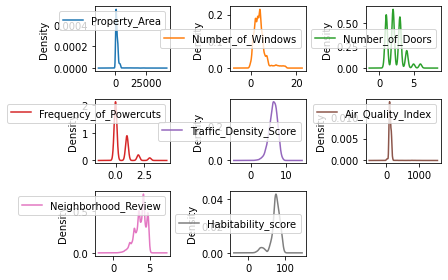

In [ ]:
train.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.tight_layout()
plt.show()

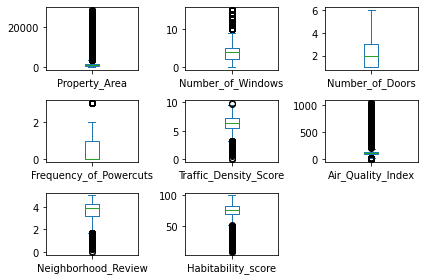

In [ ]:
train.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False)
plt.tight_layout()
plt.show()

In [ ]:
train.head()

Property_ID       Property_Type  Property_Area  Number_of_Windows  \
1      0x68d4           Apartment            733                2.0   
2      0x7d81           Apartment            737                4.0   
3      0x7a57           Apartment            900                3.0   
4      0x9409            Bungalow           2238               14.0   
5      0xbe4e  Single-family home           1185                3.0   

   Number_of_Doors       Furnishing  Frequency_of_Powercuts Power_Backup  \
1                2      Unfurnished                     1.0           No   
2                2  Fully Furnished                     0.0           No   
3                2      Unfurnished                     2.0          Yes   
4                6  Fully Furnished                     0.0           No   
5                3      Unfurnished                     0.0           No   

              Water_Supply  Traffic_Density_Score              Crime_Rate  \
1  Once in a day - Evening                   4.37      Well below average   
2  Once in a day - Morning                   7.45  Slightly below average   
3  Once in a day - Morning                   6.16      Well above average   
4                 All time                   5.46      Well below average   
5  Once in a day - Morning                   5.69      Well below average   

  Dust_and_Noise  Air_Quality_Index  Neighborhood_Review  Habitability_score  
1         Medium               96.0                 3.55               71.20  
2         Medium              121.0                 3.81               71.39  
3         Medium              100.0                 1.34               31.46  
4         Medium              116.0                 4.77               93.70  
5         Medium               91.0                 4.49               82.94

In [ ]:
train.describe()

Property_Area  Number_of_Windows  Number_of_Doors  \
count   33772.000000       33772.000000     33772.000000   
mean     1396.554601           3.926152         2.336255   
std      1968.196445           2.693232         1.182115   
min       100.000000           0.000000         1.000000   
25%       495.000000           2.000000         1.000000   
50%       932.000000           4.000000         2.000000   
75%      1776.000000           5.000000         3.000000   
max     28057.000000          15.000000         6.000000   

       Frequency_of_Powercuts  Traffic_Density_Score  Air_Quality_Index  \
count            33772.000000           33772.000000       33772.000000   
mean                 0.484247               6.355901         121.439713   
std                  0.752413               1.220580          62.396690   
min                  0.000000               0.000000           0.000000   
25%                  0.000000               5.600000          95.000000   
50%                  0.000000               6.470000         113.000000   
75%                  1.000000               7.220000         141.000000   
max                  3.000000               9.910000        1044.000000   

       Neighborhood_Review  Habitability_score  
count         33772.000000        33772.000000  
mean              3.734766           73.504198  
std               0.797297           14.070857  
min               0.000000            7.280000  
25%               3.220000           69.697500  
50%               3.850000           75.760000  
75%               4.250000           82.250000  
max               5.000000          100.000000

In [ ]:
train.isnull().sum()

Property_ID               0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

In [ ]:
train.isnull().sum() / train.shape[0]

Property_ID               0.0
Property_Type             0.0
Property_Area             0.0
Number_of_Windows         0.0
Number_of_Doors           0.0
Furnishing                0.0
Frequency_of_Powercuts    0.0
Power_Backup              0.0
Water_Supply              0.0
Traffic_Density_Score     0.0
Crime_Rate                0.0
Dust_and_Noise            0.0
Air_Quality_Index         0.0
Neighborhood_Review       0.0
Habitability_score        0.0
dtype: float64

In [ ]:
l=["Property_Type","Property_Area","Number_of_Windows","Number_of_Doors","Furnishing","Frequency_of_Powercuts","Power_Backup","Water_Supply","Traffic_Density_Score","Crime_Rate","Dust_and_Noise","Air_Quality_Index","Neighborhood_Review"]
print(len(l))

13


In [ ]:
i=0
while i<len(l):
 print(l[i]) 
 print(train[l[i]].value_counts())
 i=i+1

Property_Type
Apartment             12460
Single-family home     9803
Duplex                 4955
Bungalow               3653
Container Home         2465
#R%$G&867               436
Name: Property_Type, dtype: int64
Property_Area
427      39
474      38
443      38
487      38
489      37
         ..
2966      1
9444      1
3899      1
13138     1
3780      1
Name: Property_Area, Length: 4278, dtype: int64
Number_of_Windows
4.0     7176
3.0     6344
2.0     6086
5.0     4215
1.0     3806
7.0     1563
6.0     1561
0.0      620
9.0      323
11.0     323
12.0     312
15.0     292
8.0      292
10.0     291
14.0     284
13.0     284
Name: Number_of_Windows, dtype: int64
Number_of_Doors
2    10275
1     9616
3     9120
4     3221
6      790
5      750
Name: Number_of_Doors, dtype: int64
Furnishing
Semi_Furnished     17948
Unfurnished         9033
Fully Furnished     6791
Name: Furnishing, dtype: int64
Frequency_of_Powercuts
0.0    21702
1.0     8844
2.0     2168
3.0     1058
Name: Frequency_

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33772 entries, 1 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             33772 non-null  object 
 1   Property_Type           33772 non-null  object 
 2   Property_Area           33772 non-null  int64  
 3   Number_of_Windows       33772 non-null  float64
 4   Number_of_Doors         33772 non-null  int64  
 5   Furnishing              33772 non-null  object 
 6   Frequency_of_Powercuts  33772 non-null  float64
 7   Power_Backup            33772 non-null  object 
 8   Water_Supply            33772 non-null  object 
 9   Traffic_Density_Score   33772 non-null  float64
 10  Crime_Rate              33772 non-null  object 
 11  Dust_and_Noise          33772 non-null  object 
 12  Air_Quality_Index       33772 non-null  float64
 13  Neighborhood_Review     33772 non-null  float64
 14  Habitability_score      33772 non-null

In [ ]:
train=pd.get_dummies(train,columns=["Property_Type","Number_of_Windows","Furnishing","Frequency_of_Powercuts","Power_Backup","Water_Supply","Crime_Rate","Dust_and_Noise"])
test=pd.get_dummies(test,columns=["Property_Type","Number_of_Windows","Furnishing","Frequency_of_Powercuts","Power_Backup","Water_Supply","Crime_Rate","Dust_and_Noise"])
print(train.shape)
train.tail()


(39499, 50)


Property_Area  Number_of_Doors  Traffic_Density_Score  \
39494           1120                2                   5.55   
39495            445                3                   5.70   
39496           3780                6                   6.84   
39497           1266                1                   4.60   
39498           1229                4                   8.29   

       Air_Quality_Index  Neighborhood_Review  Habitability_score  \
39494               80.0                 3.56               73.43   
39495               86.0                 2.93               79.91   
39496              137.0                 3.80               81.44   
39497               88.0                 3.25               71.33   
39498              132.0                 4.67               83.25   

       Property_Type_#R%$G&867  Property_Type_Apartment  \
39494                        0                        0   
39495                        0                        1   
39496                        0                        0   
39497                        0                        0   
39498                        0                        0   

       Property_Type_Bungalow  Property_Type_Container Home  ...  \
39494                       0                             0  ...   
39495                       0                             0  ...   
39496                       1                             0  ...   
39497                       0                             0  ...   
39498                       0                             0  ...   

       Water_Supply_Once in a day - Evening  \
39494                                     0   
39495                                     0   
39496                                     0   
39497                                     0   
39498                                     0   

       Water_Supply_Once in a day - Morning  Water_Supply_Once in two days  \
39494                                     0                              0   
39495                                     0                              0   
39496                                     0                              1   
39497                                     1                              0   
39498                                     0                              0   

       Crime_Rate_Slightly above average  Crime_Rate_Slightly below average  \
39494                                  1                                  0   
39495                                  1                                  0   
39496                                  0                                  0   
39497                                  1                                  0   
39498                                  0                                  0   

       Crime_Rate_Well above average  Crime_Rate_Well below average  \
39494                              0                              0   
39495                              0                              0   
39496                              0                              1   
39497                              0                              0   
39498                              0                              1   

       Dust_and_Noise_High  Dust_and_Noise_Low  Dust_and_Noise_Medium  
39494                    0                   0                      1  
39495                    0                   0                      1  
39496                    0                   0                      1  
39497                    0                   0                      0  
39498                    1                   0                      0  

[5 rows x 50 columns]

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
p=imputer.fit_transform(train)
v=imputer.fit_transform(test)
train.tail()

Property_Area  Number_of_Doors  Traffic_Density_Score  \
39494           1120                2                   5.55   
39495            445                3                   5.70   
39496           3780                6                   6.84   
39497           1266                1                   4.60   
39498           1229                4                   8.29   

       Air_Quality_Index  Neighborhood_Review  Habitability_score  \
39494               80.0                 3.56               73.43   
39495               86.0                 2.93               79.91   
39496              137.0                 3.80               81.44   
39497               88.0                 3.25               71.33   
39498              132.0                 4.67               83.25   

       Property_Type_#R%$G&867  Property_Type_Apartment  \
39494                        0                        0   
39495                        0                        1   
39496                        0                        0   
39497                        0                        0   
39498                        0                        0   

       Property_Type_Bungalow  Property_Type_Container Home  ...  \
39494                       0                             0  ...   
39495                       0                             0  ...   
39496                       1                             0  ...   
39497                       0                             0  ...   
39498                       0                             0  ...   

       Water_Supply_Once in a day - Evening  \
39494                                     0   
39495                                     0   
39496                                     0   
39497                                     0   
39498                                     0   

       Water_Supply_Once in a day - Morning  Water_Supply_Once in two days  \
39494                                     0                              0   
39495                                     0                              0   
39496                                     0                              1   
39497                                     1                              0   
39498                                     0                              0   

       Crime_Rate_Slightly above average  Crime_Rate_Slightly below average  \
39494                                  1                                  0   
39495                                  1                                  0   
39496                                  0                                  0   
39497                                  1                                  0   
39498                                  0                                  0   

       Crime_Rate_Well above average  Crime_Rate_Well below average  \
39494                              0                              0   
39495                              0                              0   
39496                              0                              1   
39497                              0                              0   
39498                              0                              1   

       Dust_and_Noise_High  Dust_and_Noise_Low  Dust_and_Noise_Medium  
39494                    0                   0                      1  
39495                    0                   0                      1  
39496                    0                   0                      1  
39497                    0                   0                      0  
39498                    1                   0                      0  

[5 rows x 50 columns]

In [ ]:
train.isnull().sum()

Property_Area                           0
Number_of_Doors                         0
Traffic_Density_Score                   0
Air_Quality_Index                       0
Neighborhood_Review                     0
Habitability_score                      0
Property_Type_#R%$G&867                 0
Property_Type_Apartment                 0
Property_Type_Bungalow                  0
Property_Type_Container Home            0
Property_Type_Duplex                    0
Property_Type_Single-family home        0
Number_of_Windows_0.0                   0
Number_of_Windows_1.0                   0
Number_of_Windows_2.0                   0
Number_of_Windows_3.0                   0
Number_of_Windows_4.0                   0
Number_of_Windows_5.0                   0
Number_of_Windows_6.0                   0
Number_of_Windows_7.0                   0
Number_of_Windows_8.0                   0
Number_of_Windows_9.0                   0
Number_of_Windows_10.0                  0
Number_of_Windows_11.0            

In [ ]:
pp.ProfileReport(train, title = 'Pandas Profiling report of "Train" set', html = {'style':{'full_width': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# print(train["Number_of_Windows"].corr(train["Habitability_score"])*100)
# print(train["Number_of_Doors"].corr(train["Habitability_score"])*100)
# print(train["Property_Area"].corr(train["Habitability_score"])*100)
# print(train["Frequency_of_Powercuts"].corr(train["Habitability_score"])*100)
# print(train["Traffic_Density_Score"].corr(train["Habitability_score"])*100)
# print(train["Water_Supply_Once in a day - Evening"].corr(train["Habitability_score"])*100)
# print(train["Water_Supply_Once in a day - Morning"].corr(train["Habitability_score"])*100)
# print(train["Water_Supply_Once in two days"].corr(train["Habitability_score"])*100)
# print(train["Crime_Rate_Slightly above average"].corr(train["Habitability_score"])*100)
# print(train["Crime_Rate_Slightly below average"].corr(train["Habitability_score"])*100)
# print(train["Crime_Rate_Well above average"].corr(train["Habitability_score"])*100)
# #print(train["Crime_Rate_Well below averages"].corr(train["Habitability_score"])*100)
# print(train["Dust_and_Noise_High"].corr(train["Habitability_score"])*100)
# print(train["Dust_and_Noise_Low"].corr(train["Habitability_score"])*100)
# print(train["Dust_and_Noise_Medium"].corr(train["Habitability_score"])*100)
# print(train.shape)

In [ ]:

y=train['Habitability_score']
x=train.drop(["Habitability_score"],axis=1)
#Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features 
train.drop(to_drop, axis=1, inplace=True)
print(train.shape)

(39499, 41)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
  
  
# scaling the inputs
scaler = StandardScaler()
scaled_X = scaler.fit_transform(x)
  
# Train Test split will be used for both models
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                                    test_size = 0.3)
  
# training model with 0.5 alpha value
model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)
model.fit(X_train, y_train)
  
# predicting the y_test
y_pred = model.predict(X_test)
  
# finding score for our model
score = model.score(X_test, y_test)
print("\n\nModel score : ", score)



Model score :  0.5966103100056108


In [ ]:
p=model.predict(test)
output = pd.DataFrame({'Property_ID':m,'Habitability_score': p})

In [ ]:
output.tail

<bound method NDFrame.tail of       Property_ID  Habitability_score
0          0x6e93          129.015021
1          0x8787          197.116369
2          0x6c17          142.832172
3          0x9dbd          138.441561
4          0xbfde          579.465069
...           ...                 ...
10495      0x423d          248.554100
10496      0x78c5          142.669907
10497       0xbf3         4525.664980
10498      0x305b          331.641465
10499      0x5cff          195.446850

[10500 rows x 2 columns]>

In [18]:
output.to_csv(r"C:\Users\Dell\Desktop\output.csv", index=False , header=False)
print(output.shape)

(10500, 2)
